## Custom Object Detection and Novel Bounding Box Metric with YOLO

### YOLO based object detection pipeline is implemented using ultralytics YOLOv5

### Install required libraries

In [1]:
!pip install ultralytics opencv-python numpy

  Using cached torch-2.2.0-cp38-cp38-win_amd64.whl.metadata (26 kB)
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   - -------------------------------------- 30.7/914.9 kB 1.3 MB/s eta 0:00:01
   -- ------------------------------------- 61.4/914.9 kB 1.1 MB/s eta 0:00:01
   -- ------------------------------------- 61.4/914.9 kB 1.1 MB/s eta 0:00:01
   --- ----------------------------------- 92.2/914.9 kB 581.0 kB/s eta 0:00:02
   ----- -------------------------------- 143.4/914.9 kB 708.1 kB/s eta 0:00:02
   ------- ------------------------------ 174.1/914.9 kB 748.1 kB/s eta 0:00:01
   ------- ------------------------------ 174.1/914.9 kB 748.1 kB/s eta 0:00:01
   -------- ----------------------------- 215.0/914.9 kB 622.5 kB/s eta 0:00:02
   --------- ---------------------------- 225.3/914.9 kB 573.4 kB/s eta 0:00:02
   ------------ ------------------------- 307.2/914.9 kB 678.0 kB/s eta 0:00:01
   -------------- ----------------------- 348.2/914.9 kB 720.5 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
realtimestt 0.1.9 requires torch==2.1.2, but you have torch 2.2.0 which is incompatible.
torchaudio 2.1.2 requires torch==2.1.2, but you have torch 2.2.0 which is incompatible.


### Clone yolov5 codebase and install required libraries

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [1]:
!cd yolov5 && pip install -r requirements.txt

  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)


### Model Training

#### Yolov5s was trained for 100 epochs with default hyperparameters

In [7]:
!python yolov5/train.py --img 640 --batch 16 --epochs 100 --data dataset/data.yaml --weights yolov5s.pt --device 0

Error decoding JSON from C:\Users\USER\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\USER\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


train: weights=yolov5s.pt, cfg=, data=dataset/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-398-g5cdad892 Python-3.8.20 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=

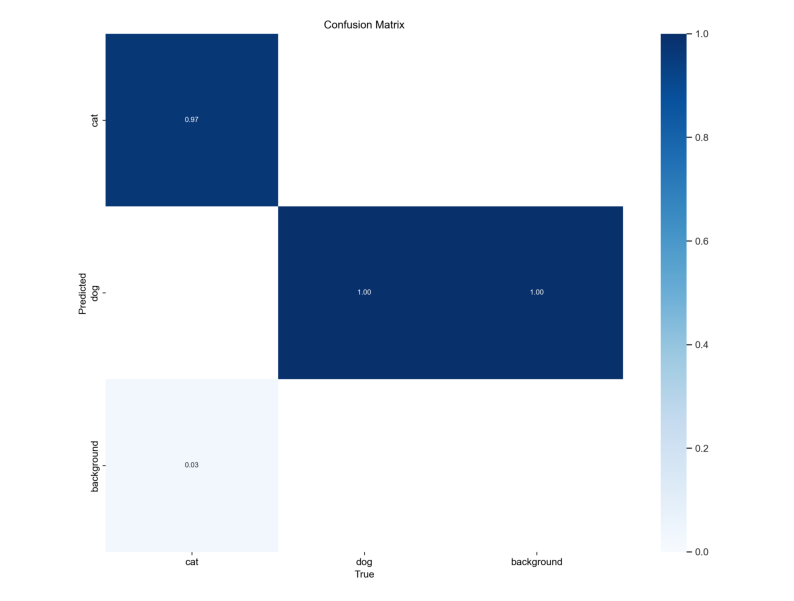

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = r"yolov5\runs\train\exp17\confusion_matrix.png"  # Replace with your image path
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))  # You can adjust the values to fit your needs

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#### Test set evaluation with IoU

In [9]:
!python yolov5/val.py --weights yolov5/runs/train/exp17/weights/best.pt --data dataset/data.yaml --img 640 --task test --device 0

val: data=dataset/data.yaml, weights=['yolov5/runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-398-g5cdad892 Python-3.8.20 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

test: Scanning D:\Projects\YOLO2\dataset\test\labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
test: Scanning D:\Projects\YOLO2\dataset\test\labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class  

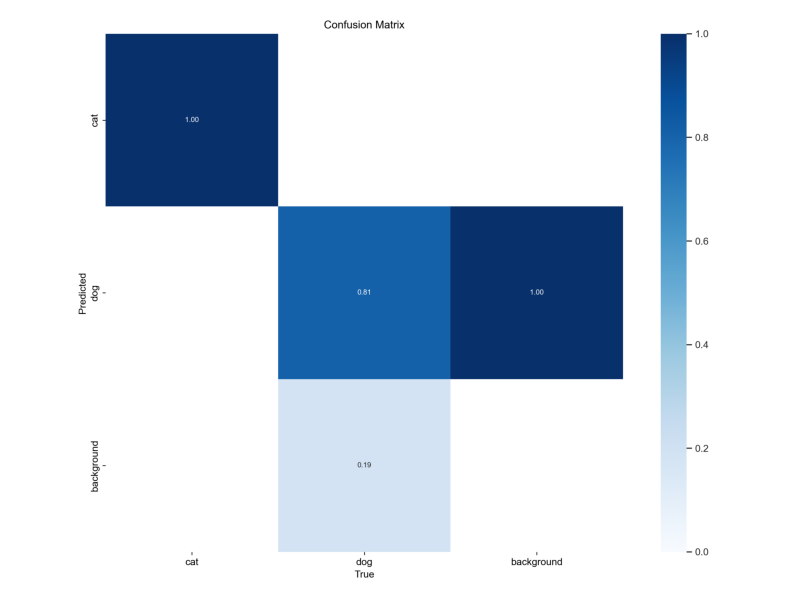

In [31]:
image_path = r"yolov5\runs\val\exp4\confusion_matrix.png"  # Replace with your image path
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))  # You can adjust the values to fit your needs

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

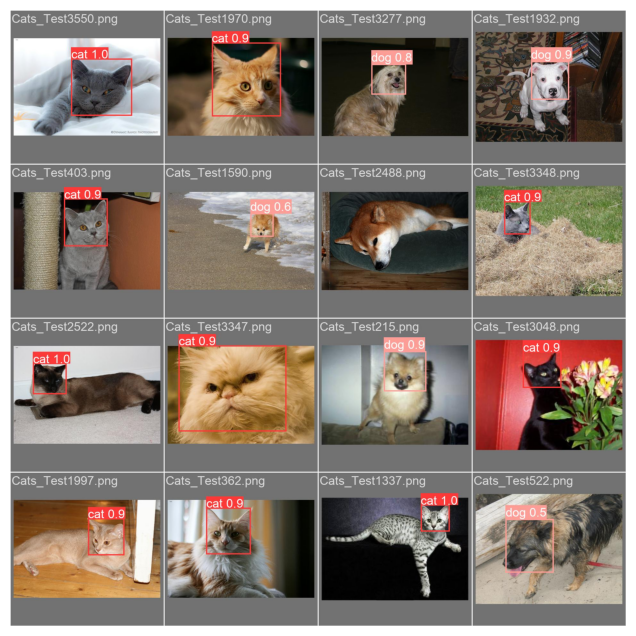

In [ ]:
image_path = r"yolov5\runs\val\exp4\val_batch0_pred.jpg"  # Replace with your image path
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))  # You can adjust the values to fit your needs

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

### Model evaluation with custom bounding box similarity metric

def calculate_S_total(box1, box2, weights=[0.5, 0.2, 0.15, 0.15], eps=1e-7):

    # Find centers
    c1 = (box1[:, :2] + box1[:, 2:]) / 2
    c2 = (box2[:, :2] + box2[:, 2:]) / 2

    # Compute pairwise Euclidean distance between centers
    d = torch.norm(c1.unsqueeze(1) - c2.unsqueeze(0), dim=2)

    # Compute enclosing box (W, H)
    min_xy = torch.min(box1[:, None, :2], box2[:, :2])
    max_xy = torch.max(box1[:, None, 2:], box2[:, 2:])

    wh = max_xy - min_xy
    d_max = torch.norm(wh, dim=2)

    # Compute similarity
    S_center = 1 - (d / (d_max + 1e-7))
    S_center = torch.clamp(S_center, min=0)

    # Compute IoU
    iou = box_iou(box1, box2)

    # Compute width and height
    wh1 = box1[:, 2:] - box1[:, :2]
    wh2 = box2[:, 2:] - box2[:, :2]

    # Compute aspect ratios (w/h)
    r1 = wh1[:, 0] / (wh1[:, 1] + 1e-7)
    r2 = wh2[:, 0] / (wh2[:, 1] + 1e-7)

    # Compute aspect ratio similarity
    min_r = torch.min(r1[:, None], r2[None, :])
    max_r = torch.max(r1[:, None], r2[None, :])

    S_aspect = min_r / (max_r + 1e-7)

    # Compute areas
    A1 = wh1[:, 0] * wh1[:, 1]
    A2 = wh2[:, 0] * wh2[:, 1]

    # Compute scale similarity
    min_A = torch.min(A1[:, None], A2[None, :])
    max_A = torch.max(A1[:, None], A2[None, :])

    S_scale = min_A / (max_A + 1e-7)

    # Combine all components using the given weights
    S_total = (
        weights[0] * iou
        + weights[1] * S_center
        + weights[2] * S_aspect
        + weights[3] * S_scale
    )
    return S_total

Custom metric calculation function was added into the metrics.py script and it is called from val.py script to calculate similarity between bounding boxes

In [21]:
!python yolov5/val.py --weights yolov5/runs/train/exp17/weights/best.pt --data dataset/data.yaml --img 640 --task test --device 0

val: data=dataset/data.yaml, weights=['yolov5/runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  2025-2-16 Python-3.8.20 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

test: Scanning D:\Projects\Custom-Object-Detection-YOLO\dataset\test\labels...:   0%|          | 0/35 [00:00<?, ?it/s]
test: Scanning D:\Projects\Custom-Object-Detection-YOLO\dataset\test\labels... 1 images, 0 backgrounds, 0 corrupt:   3%|▎         | 1/35 [00:09<05:10,  9.14s/it]
test: Scanning D:\Projects\Custom-Object-Detection-YOLO\dataset\test\labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:09<00:00,  3.83i

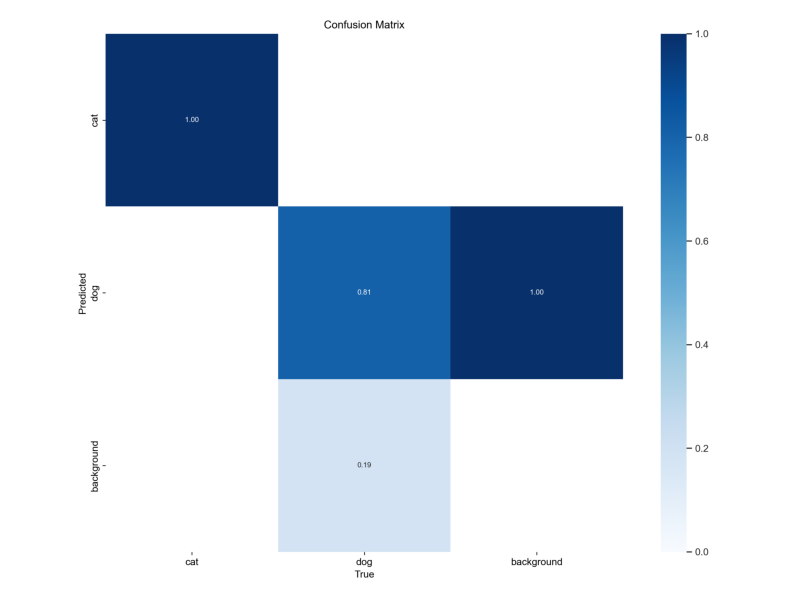

In [30]:
image_path = r"yolov5\runs\val\exp9\confusion_matrix.png"  # Replace with your image path
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))  # You can adjust the values to fit your needs

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

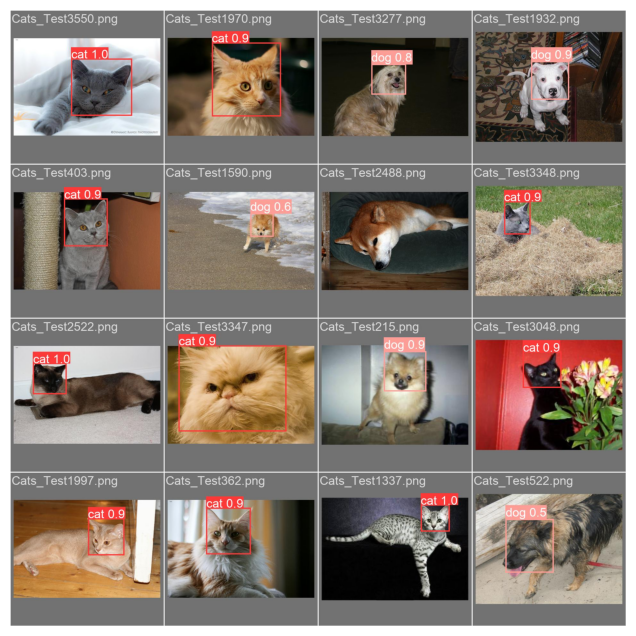

In [29]:
image_path = r"yolov5\runs\val\exp9\val_batch0_pred.jpg"  # Replace with your image path
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))  # You can adjust the values to fit your needs

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()